<a href="https://colab.research.google.com/github/taetae991202/termproject/blob/main/termproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
import statsmodels.formula.api as smf

In [60]:
data = pd.read_csv('/content/drive/MyDrive/data/data/train_data/train_task_3_4.csv')
print(data.shape)
data.head()

(1382727, 6)


,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
0,898,2111,280203,1,2,2
1,767,3062,55638,1,3,3
2,165,1156,386475,1,2,2
3,490,1653,997498,1,4,4
4,298,3912,578636,1,3,3


In [61]:
# calc percent of correct for each question
val_df =pd.DataFrame()
for k,df in data.groupby('QuestionId'):
    print(k, len(df), df['IsCorrect'].mean(), df['IsCorrect'].sem(), df['IsCorrect'].var())


0 2812 0.44345661450924606 0.00937010933612387 0.24689064450621495
1 14 0.5714285714285714 0.13725270326150324 0.26373626373626374
2 2313 0.3852140077821012 0.01012089927190456 0.23692660859262452
3 2672 0.8087574850299402 0.007609645680958906 0.15472672214537603
4 1704 0.4014084507042254 0.011878216105763999 0.24042079842531408
5 833 0.1908763505402161 0.013624539924512865 0.1546281974328193
6 1718 0.5285215366705471 0.012046950521125473 0.24933165096280901
7 89 0.34831460674157305 0.050788279503341166 0.2295709908069459
8 2327 0.3919209282337774 0.010122188032315155 0.23842137293671323
9 834 0.36330935251798563 0.016664029411268603 0.23159335676716727
10 1572 0.4020356234096692 0.012370345562832941 0.2405560063686118
11 2171 0.45831414094887146 0.010696101386212332 0.2483766957400336
12 1701 0.3991769547325103 0.011877678361556275 0.23997579278625022
13 1259 0.6965845909451946 0.012961803326362887 0.21152250694838182
14 1697 0.6682380671773719 0.01143315150226891 0.22182666970569595


In [62]:
val_df =pd.DataFrame({'QuestionId':[], 'n':[], 'mean':[], 'sem':[], 'var':[]})
len(val_df)
for k,df in data.groupby('QuestionId'):
    val_df.loc[len(val_df)] = [k, len(df), df['IsCorrect'].mean(), df['IsCorrect'].sem(), df['IsCorrect'].var()]

print(val_df.shape)
val_df = val_df.set_index('QuestionId')
val_df.head(20)

(948, 5)


,n,mean,sem,var
QuestionId,,,,
0.0,2812.0,0.443457,0.009370,0.246891
1.0,14.0,0.571429,0.137253,0.263736
2.0,2313.0,0.385214,0.010121,0.236927
3.0,2672.0,0.808757,0.007610,0.154727
4.0,1704.0,0.401408,0.011878,0.240421
5.0,833.0,0.190876,0.013625,0.154628
6.0,1718.0,0.528522,0.012047,0.249332
7.0,89.0,0.348315,0.050788,0.229571
8.0,2327.0,0.391921,0.010122,0.238421


In [63]:
data.groupby('QuestionId')

validatioin set
















...................................................................

In [64]:
# load evaluators' score on "validation" set
eval_validation = pd.read_csv('/content/drive/MyDrive/data/data/test_data/quality_response_remapped_public.csv')
print(len(eval_validation))
eval_validation.head()

25


,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,0,0,909,318,2,2,2,1.0,2
1,16,16,285,609,2,2,2,2.0,2
2,48,48,132,271,1,2,2,2.0,1
3,38,38,704,127,2,2,1,2.0,2
4,33,33,16,586,1,1,2,2.0,2


<Axes: >

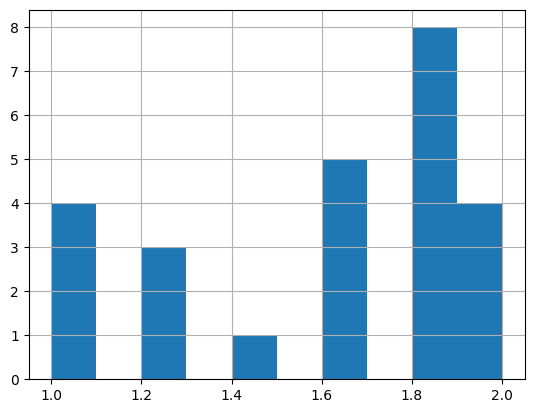

In [65]:
# take the average of 5 evaulators` scores
eval_validation['score'] = eval_validation.filter(regex='^T', axis = 1).mean(axis=1)
eval_validation['score'].hist()

<Axes: >

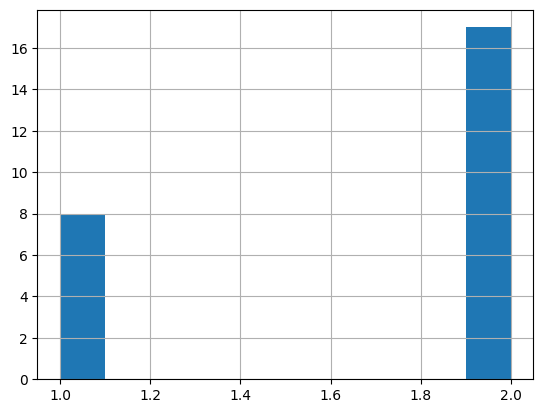

In [66]:
# decide preference
import numpy as np
def calc_preference(scores):
    preference = np.ones(len(scores), dtype=int)

    idx_two = scores > 1.5
    preference[idx_two] = 2
    
    return list(preference)

eval_validation['preference'] = calc_preference(eval_validation['score'])
# eval_dev[]
# eval_dev['score']
eval_validation['preference'].hist()

In [67]:
print(eval_validation.shape)
eval_validation.head()

(25, 11)


,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score,preference
0,0,0,909,318,2,2,2,1.0,2,1.8,2
1,16,16,285,609,2,2,2,2.0,2,2.0,2
2,48,48,132,271,1,2,2,2.0,1,1.6,2
3,38,38,704,127,2,2,1,2.0,2,1.8,2
4,33,33,16,586,1,1,2,2.0,2,1.6,2


In [68]:
val_list = []
good_question = []
bad_question = []
score = {}
for idx, row in eval_validation.iterrows():
  val_list.append([row['left'], row['right'], row['preference']])
  if row['preference'] == 1:
    good_question.append(row['left'])
    bad_question.append(row['right'])
    score[row['left']] = row['score']
    score[row['right']] =2.0 -  row['score']
  else:
    good_question.append(row['right'])
    bad_question.append(row['left'])
    score[row['right']] = row['score']
    score[row['left']] =2.0 - row['score']

print(val_list)
print(good_question)
print(bad_question)
print(score)

[[909.0, 318.0, 2.0], [285.0, 609.0, 2.0], [132.0, 271.0, 2.0], [704.0, 127.0, 2.0], [16.0, 586.0, 2.0], [56.0, 865.0, 2.0], [233.0, 478.0, 1.0], [877.0, 620.0, 2.0], [246.0, 733.0, 1.0], [668.0, 741.0, 1.0], [691.0, 4.0, 2.0], [403.0, 830.0, 2.0], [404.0, 27.0, 2.0], [202.0, 761.0, 2.0], [555.0, 815.0, 1.0], [527.0, 876.0, 2.0], [225.0, 558.0, 2.0], [316.0, 121.0, 2.0], [363.0, 780.0, 2.0], [118.0, 116.0, 1.0], [676.0, 153.0, 1.0], [527.0, 129.0, 2.0], [327.0, 721.0, 2.0], [158.0, 139.0, 1.0], [547.0, 578.0, 1.0]]
[318.0, 609.0, 271.0, 127.0, 586.0, 865.0, 233.0, 620.0, 246.0, 668.0, 4.0, 830.0, 27.0, 761.0, 555.0, 876.0, 558.0, 121.0, 780.0, 118.0, 676.0, 129.0, 721.0, 158.0, 547.0]
[909.0, 285.0, 132.0, 704.0, 16.0, 56.0, 478.0, 877.0, 733.0, 741.0, 691.0, 403.0, 404.0, 202.0, 815.0, 527.0, 225.0, 316.0, 363.0, 116.0, 153.0, 527.0, 327.0, 139.0, 578.0]
{318.0: 1.8, 909.0: 0.19999999999999996, 609.0: 2.0, 285.0: 0.0, 271.0: 1.6, 132.0: 0.3999999999999999, 127.0: 1.8, 704.0: 0.1999999

graph
.
.
.
.
.
.

.
.
.


QuestionId
0    0.443457
1    0.571429
2    0.385214
3    0.808757
4    0.401408
Name: IsCorrect, dtype: float64


Text(0, 0.5, 'count')

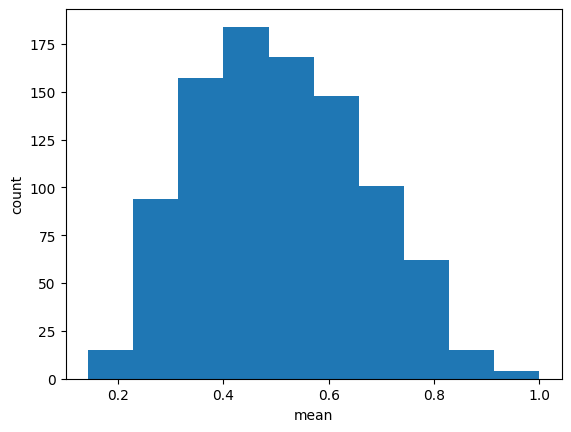

In [69]:
# hist mean
mean = data.groupby('QuestionId').mean()['IsCorrect']
print(mean.head())
plt.hist(mean)
plt.xlabel('mean')
plt.ylabel('count')

In [70]:
val_good_mean = mean[good_question]
val_bad_mean = mean[bad_question]
print(len(bad_question))
print(len(good_question))
mean = mean[good_question + bad_question]
mean

25
25


QuestionId
318    0.512821
609    0.452665
271    0.387486
127    0.431193
586    0.246761
865    0.297436
233    0.490023
620    0.423168
246    0.309091
668    0.720177
4      0.401408
830    0.513130
27     0.451696
761    0.404580
555    0.446585
876    0.379747
558    0.466667
121    0.359281
780    0.394322
118    0.518489
676    0.577137
129    0.479628
721    0.604527
158    0.400815
547    0.517100
909    0.530864
285    0.651419
132    0.387779
704    0.577481
16     0.583478
56     0.516450
478    0.601036
877    0.514231
733    0.847059
741    0.711146
691    0.655678
403    0.652292
404    0.448221
202    0.777678
815    0.774282
527    0.714608
225    0.344444
316    0.302083
363    0.711934
116    0.532516
153    0.750000
527    0.714608
327    0.412210
139    0.333333
578    0.577778
Name: IsCorrect, dtype: float64

In [71]:
len(mean)

50

In [72]:
val_good_mean = pd.DataFrame(val_good_mean)
val_bad_mean = pd.DataFrame(val_bad_mean)

<BarContainer object of 25 artists>

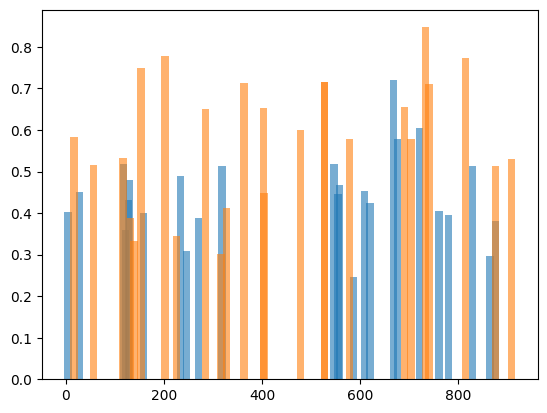

In [73]:
plt.bar(val_good_mean.index ,val_good_mean['IsCorrect'], width=15, alpha=0.6 )
plt.bar(val_bad_mean.index ,val_bad_mean['IsCorrect'], width=15, alpha=0.6 )

In [74]:
mean_df = pd.DataFrame(mean)
mean_df.index

Int64Index([318, 609, 271, 127, 586, 865, 233, 620, 246, 668,   4, 830,  27,
            761, 555, 876, 558, 121, 780, 118, 676, 129, 721, 158, 547, 909,
            285, 132, 704,  16,  56, 478, 877, 733, 741, 691, 403, 404, 202,
            815, 527, 225, 316, 363, 116, 153, 527, 327, 139, 578],
           dtype='int64', name='QuestionId')

In [75]:
mean_df['bg'] = 0

In [76]:
mean_df.columns

Index(['IsCorrect', 'bg'], dtype='object')

In [77]:
for idx in good_question:
  mean_df.loc[idx, 'bg'] = 1

for idx in bad_question:
  mean_df.loc[idx, 'bg'] = 0

print(len(mean_df))
mean_df.head()

50


,IsCorrect,bg
QuestionId,,
318,0.512821,1
609,0.452665,1
271,0.387486,1
127,0.431193,1
586,0.246761,1


In [78]:
mean_df['score'] = 0

In [79]:
for idx, sc in score.items():
  mean_df.loc[idx, 'score'] = sc

print(len(mean_df))
mean_df.head()

50


,IsCorrect,bg,score
QuestionId,,,
318,0.512821,1,1.8
609,0.452665,1,2.0
271,0.387486,1,1.6
127,0.431193,1,1.8
586,0.246761,1,1.6


In [80]:
print(good_question)
print(bad_question)

[318.0, 609.0, 271.0, 127.0, 586.0, 865.0, 233.0, 620.0, 246.0, 668.0, 4.0, 830.0, 27.0, 761.0, 555.0, 876.0, 558.0, 121.0, 780.0, 118.0, 676.0, 129.0, 721.0, 158.0, 547.0]
[909.0, 285.0, 132.0, 704.0, 16.0, 56.0, 478.0, 877.0, 733.0, 741.0, 691.0, 403.0, 404.0, 202.0, 815.0, 527.0, 225.0, 316.0, 363.0, 116.0, 153.0, 527.0, 327.0, 139.0, 578.0]


In [81]:
val_df = val_df.loc[[318.0, 609.0, 271.0, 127.0, 586.0, 865.0, 233.0, 620.0, 246.0, 668.0, 4.0, 830.0, 27.0, 761.0, 555.0, 876.0, 558.0, 121.0, 780.0, 118.0, 676.0, 129.0, 721.0, 158.0, 547.0, 909.0, 285.0, 132.0, 704.0, 16.0, 56.0, 478.0, 877.0, 733.0, 741.0, 691.0, 403.0, 404.0, 202.0, 815.0, 527.0, 225.0, 316.0, 363.0, 116.0, 153.0, 527.0, 327.0, 139.0, 578.0]]

In [82]:
val_df = pd.concat([val_df, mean_df],axis=1)

In [83]:
val_df

,n,mean,sem,var,IsCorrect,bg,score
QuestionId,,,,,,,
318.0,78.0,0.512821,0.056962,0.253080,0.512821,1,1.8
609.0,1595.0,0.452665,0.012467,0.247915,0.452665,1,2.0
271.0,911.0,0.387486,0.016150,0.237601,0.387486,1,1.6
127.0,109.0,0.431193,0.047655,0.247537,0.431193,1,1.8
586.0,1698.0,0.246761,0.010466,0.185979,0.246761,1,1.6
865.0,585.0,0.297436,0.018916,0.209326,0.297436,1,1.8
233.0,2606.0,0.490023,0.009794,0.249996,0.490023,1,1.2
620.0,846.0,0.423168,0.016996,0.244386,0.423168,1,2.0
246.0,1265.0,0.309091,0.012998,0.213723,0.309091,1,1.2


In [84]:
val_df.corr()

,n,mean,sem,var,IsCorrect,bg,score
n,1.000000,0.299989,-0.556143,-0.098766,0.299989,0.044355,-0.197995
mean,0.299989,1.000000,0.006155,-0.439390,1.000000,-0.477871,-0.414186
sem,-0.556143,0.006155,1.000000,0.232943,0.006155,-0.181294,-0.012900
var,-0.098766,-0.439390,0.232943,1.000000,-0.439390,0.247481,0.215195
IsCorrect,0.299989,1.000000,0.006155,-0.439390,1.000000,-0.477871,-0.414186
bg,0.044355,-0.477871,-0.181294,0.247481,-0.477871,1.000000,0.859675
score,-0.197995,-0.414186,-0.012900,0.215195,-0.414186,0.859675,1.000000


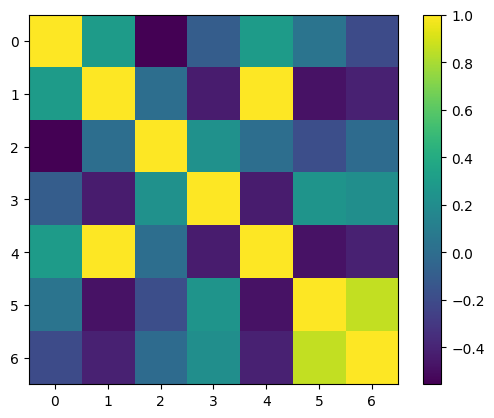

In [99]:
cor = val_df.corr()
plt.imshow(cor)
plt.colorbar()

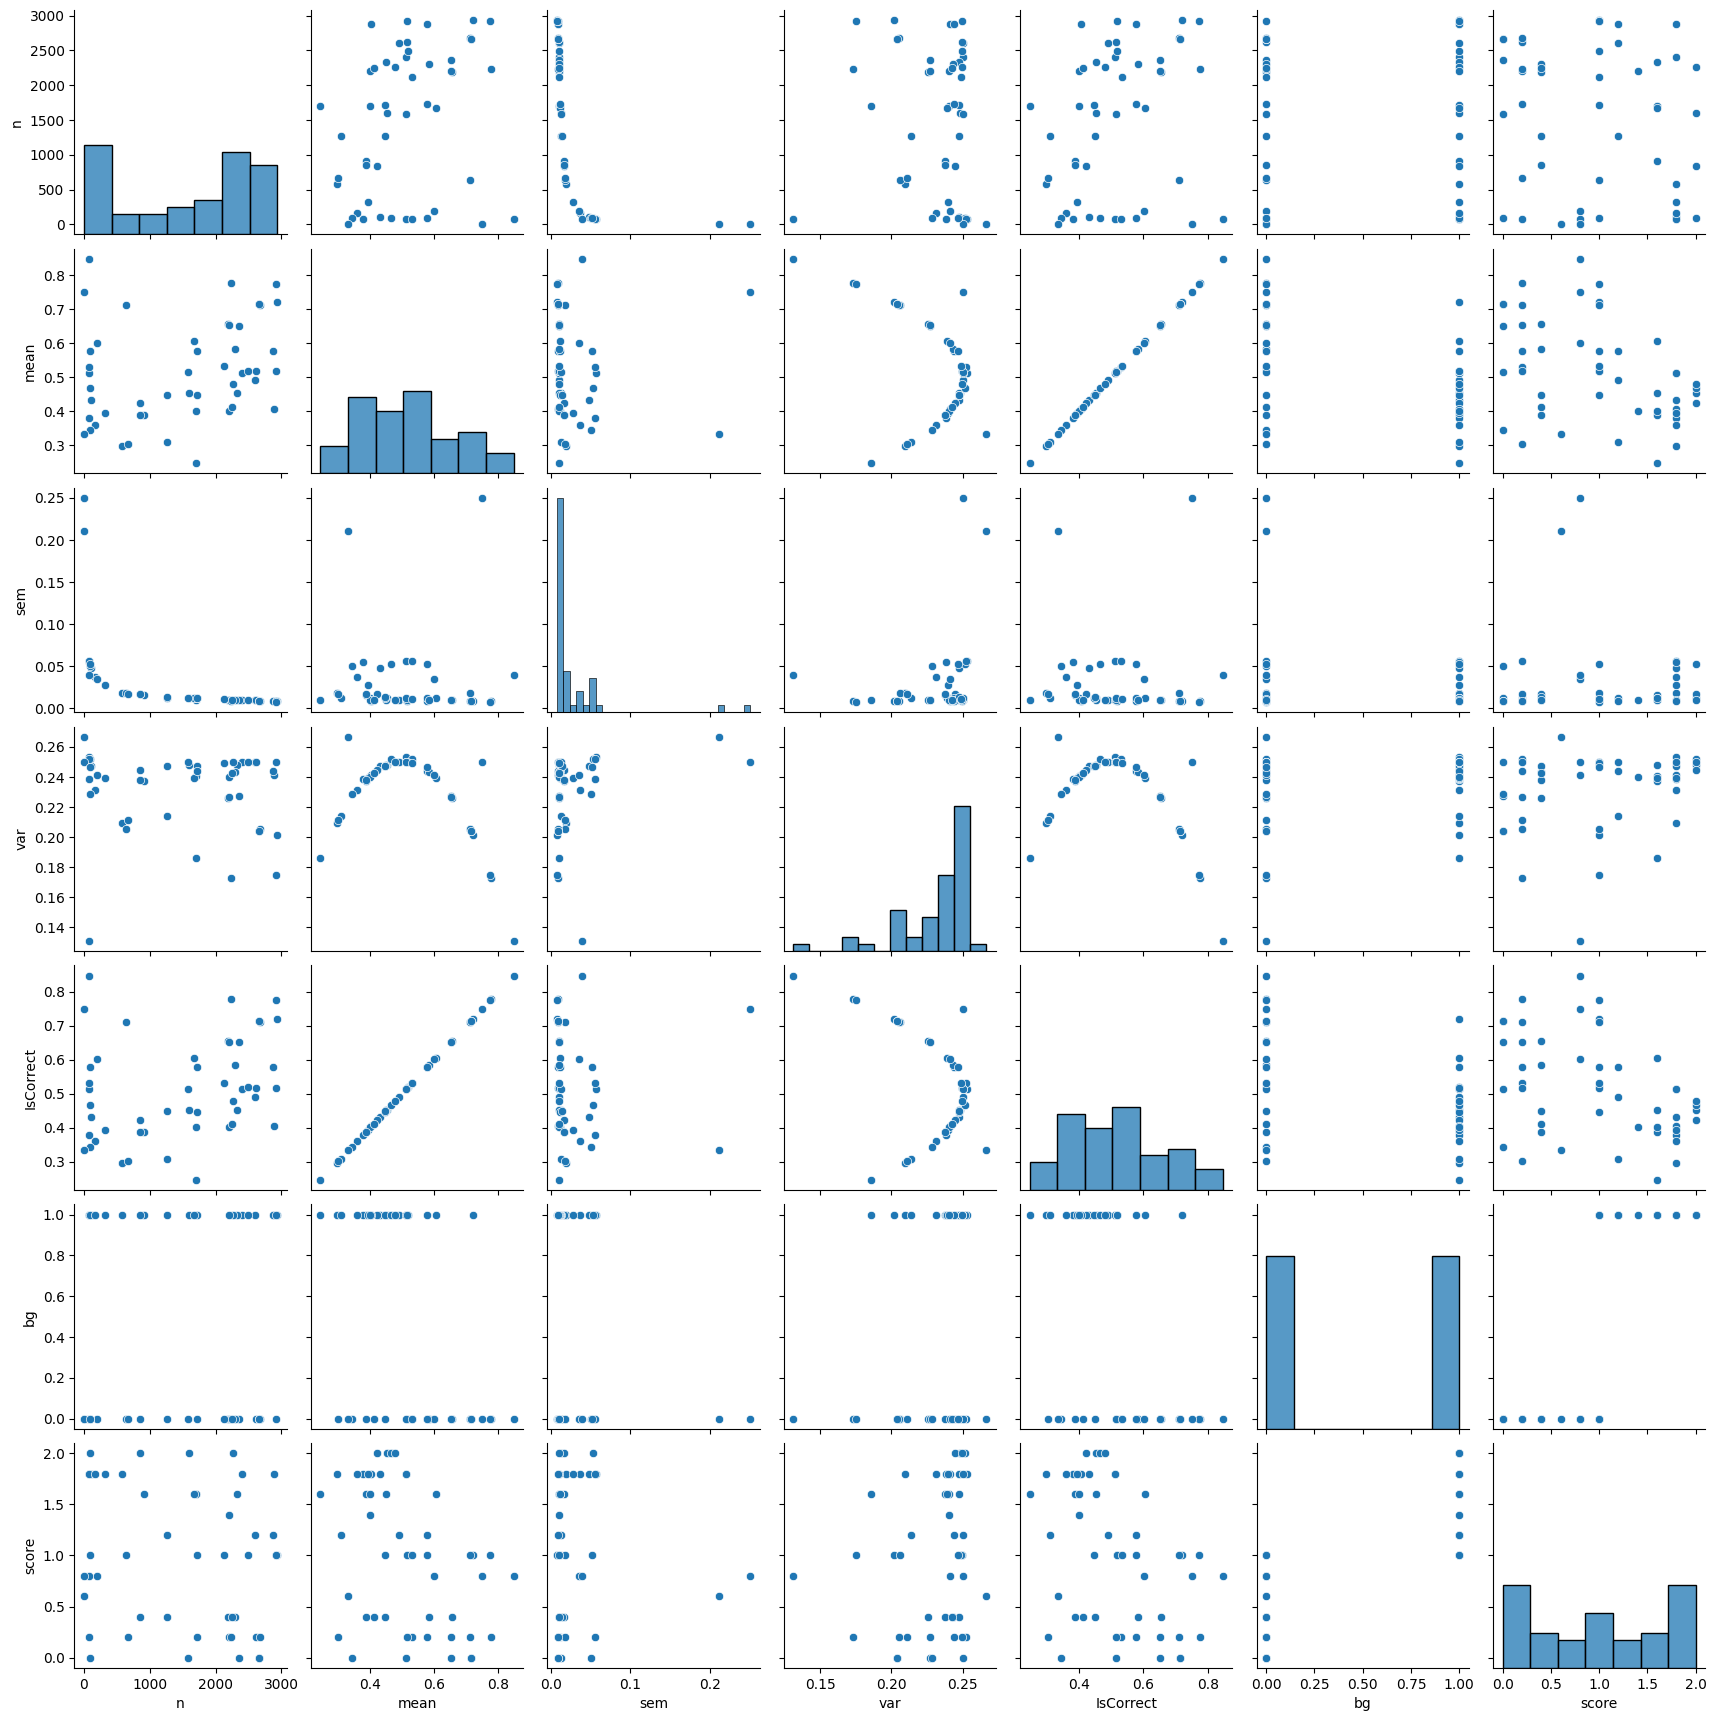

In [85]:
sns.pairplot(val_df)

In [86]:
from sklearn.linear_model import LogisticRegression


In [87]:
features = val_df[['mean',	'var']]
target = val_df['bg']

model = LogisticRegression()

model.fit(features, target)


LogisticRegression()

In [98]:
# 모델 확인
a = pd.DataFrame({'mean':[0.3, 0.4, 0.9],	'var':[0.22, 0.55, 0.99]})
p = model.predict(a)
print(p)
p = model.predict_proba(a)
print(p)

[1 1 0]
[[0.42717662 0.57282338]
 [0.4503088  0.5496912 ]
 [0.60503343 0.39496657]]


In [91]:
train_df =pd.DataFrame({'QuestionId':[], 'n':[], 'mean':[], 'sem':[], 'var':[]})
len(train_df)
for k,df in data.groupby('QuestionId'):
    train_df.loc[len(train_df)] = [k, len(df), df['IsCorrect'].mean(), df['IsCorrect'].sem(), df['IsCorrect'].var()]

print(train_df.shape)
train_df = train_df.set_index('QuestionId')
train_df.head()

(948, 5)


,n,mean,sem,var
QuestionId,,,,
0.0,2812.0,0.443457,0.009370,0.246891
1.0,14.0,0.571429,0.137253,0.263736
2.0,2313.0,0.385214,0.010121,0.236927
3.0,2672.0,0.808757,0.007610,0.154727
4.0,1704.0,0.401408,0.011878,0.240421


In [92]:
# 순위 매기기
a = train_df[['mean',	'var']]
p = model.predict(a)
print(p)
print(len(p))
p = model.predict_proba(a)
print(p)
print(p[:, 1])

[1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0
 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1
 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0
 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0
 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0
 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0
 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1
 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0
 1 0 1 1 0 1 1 0 1 0 1 0 

In [93]:
from scipy.stats import rankdata
r = np.argsort(p[:, 1])[::-1]
print(r)

[944 931 155 425 718 784   5 500 818 251 598 104 245 146  93  61 752 857
 575 208  33 603 757 661 541 586 925 418 580 528 879 729 180 442 846 126
  94 481 439 182 169  46 743 276 338 339 307 223 605 856 308 142 110 599
 282 192 329 726 734 128 179 843  68 301 218 382  87 762 426 663 792 241
 936 303 273 698 777 611 495 865 709 117 175 538 351  70 230 455 711 172
 316 560 684 537 771 883 824 244 588 543 878 258 699  63 246 352 904 430
 641 886 619 365  18 493 181 523 268 822 775 702  44 618 149 875 237 647
 613 428 139 108 694 851 793 161 470 387 842 703 708 286 623  41 797  79
 269  77 628 358 531 670 882 324 225 191 774 112 166 437 197 130   7 152
 801  40 395 556 419 913 388 206 173 322 932 121 189 624 240 800  42 680
 356   9 423 559 120 136 291 229  67 789 159 310 424 759 212 849 888 769
 542 107 873 186 504 242 719 471 210 390 674 262 483 820 174 434 929 148
 876 486 906 124  48 589 226  57 400  95 456   2  32 869 385 903 640  84
 918 467 632 215 271 132 279 162 725 364 915 487   

In [94]:
template = pd.read_csv('/content/drive/MyDrive/template (1).csv')
template

,QuestionId,ranking
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
...,...,...
943,943,NaN
944,944,NaN
945,945,NaN
946,946,NaN


In [95]:
for idx, rank in enumerate(r):
  template.loc[idx, 'ranking'] = rank

template

,QuestionId,ranking
0,0,944.0
1,1,931.0
2,2,155.0
3,3,425.0
4,4,718.0
...,...,...
943,943,422.0
944,944,924.0
945,945,660.0
946,946,847.0


In [96]:
template.to_csv('/content/drive/MyDrive/data/20212780.csv')